<a href="https://colab.research.google.com/github/jshivamds272/Data-science-projects/blob/main/Human_Activity_Recognition_using_mobile_phones_by_Boosting_and_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('/content/LtqlhJ-TQPaapYSfk0D2IA_0e282b4d3b394af096b2512db121ff33_Human_Activity_Recognition_Using_Smartphones_Data.csv') #import dataset

In [3]:
data.shape  #shape of dataset

(4435, 562)

In [4]:
data.dtypes   #data typesw of features

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

In [5]:
float_columns=(data.dtypes==np.float)          
print( (data.loc[:,float_columns].max()==1).all())          #checked min and maxm value of float datatypes features
print((data.loc[:,float_columns].min()==-1).all())

False
False


In [6]:
from sklearn.preprocessing import LabelEncoder       #did label incoding for target feature
le=LabelEncoder()
data.iloc[:,-1]=le.fit_transform(data.iloc[:,-1])
le.classes_

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS', nan], dtype=object)

In [7]:
data.Activity.unique()

array([2, 1, 0, 3, 4, 5, 6])

In [8]:
data.Activity.value_counts(normalize=True)   #find percentage of classes of target feature

2    0.189853
0    0.185118
1    0.175874
3    0.171139
5    0.145209
4    0.132582
6    0.000225
Name: Activity, dtype: float64

In [12]:
data.isnull().sum() #checked features contains how much null values

tBodyAcc-mean()-X                       0
tBodyAcc-mean()-Y                       0
tBodyAcc-mean()-Z                       0
tBodyAcc-std()-X                        0
tBodyAcc-std()-Y                        0
                                       ..
angle(tBodyGyroJerkMean,gravityMean)    1
angle(X,gravityMean)                    1
angle(Y,gravityMean)                    1
angle(Z,gravityMean)                    1
Activity                                0
Length: 562, dtype: int64

In [14]:
data.dropna(how='any',inplace=True)      #just droped null values

In [15]:
from sklearn.model_selection import train_test_split         #divided data into train and test set
feature_col=[x for x in data.columns if x!='Activity']

x_train,x_test,y_train,y_test=train_test_split(data[feature_col],data['Activity'],test_size=0.3,random_state=42)

In [16]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape           #checked shapes of all train and test dataset

((3103, 561), (3103,), (1331, 561), (1331,))

Gradient Boosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
error_list=list()
tree_list=[15,25,50,100,200,400]
for n_trees in tree_list:
  GBC=GradientBoostingClassifier(max_features=5,n_estimators=n_trees,random_state=42)
  print(f'Fitting model with {n_trees} trees')
  GBC.fit(x_train.values,y_train.values)
  y_pred=GBC.predict(x_test)
  error=1-accuracy_score(y_test,y_pred)
  error_list.append(pd.Series({'n_trees':n_trees,'error':error}))
print(error_list)
error_df=pd.concat(error_list,axis=1).T.set_index('n_trees')
error_df

Fitting model with 15 trees


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Fitting model with 25 trees


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Fitting model with 50 trees


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Fitting model with 100 trees


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Fitting model with 200 trees


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Fitting model with 400 trees
[n_trees    15.000000
error       0.101427
dtype: float64, n_trees    25.000000
error       0.054846
dtype: float64, n_trees    50.000000
error       0.032307
dtype: float64, n_trees    100.000000
error        0.018032
dtype: float64, n_trees    200.00000
error        0.01127
dtype: float64, n_trees    400.00000
error        0.01127
dtype: float64]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


,error
n_trees,
15.0,0.101427
25.0,0.054846
50.0,0.032307
100.0,0.018032
200.0,0.011270
400.0,0.011270


(0.0, 440.00000000000006)

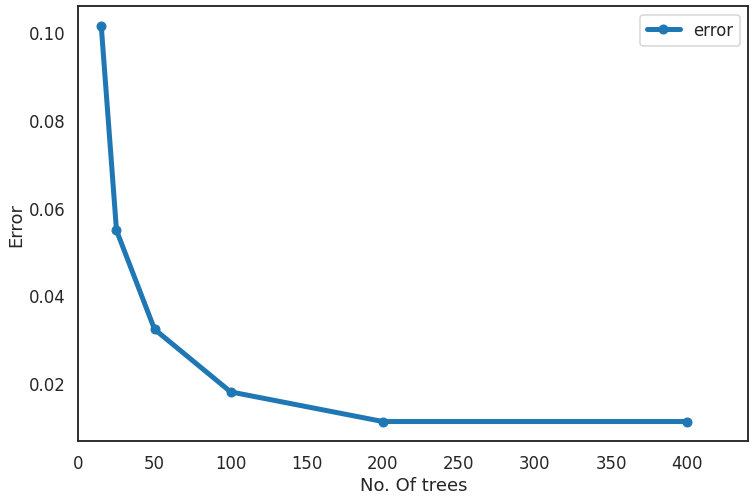

In [18]:
sns.set_context('talk')          #plotted error vs no of trees and found optimal point
sns.set_style('white')
#sns.set_palette(palette)
#create the plot
ax=error_df.plot(marker='o',figsize=(12,8),linewidth=5)
ax.set(xlabel='No. Of trees',ylabel='Error')
ax.set_xlim(0,max(error_df.index)*1.1)

In [20]:
from sklearn.model_selection import GridSearchCV    # did modal selection by grid search cv and perform gradient boosting
param_grid={'learning_rate':[0.1,0.01,0.001],
            'subsample':[1,0.5],
            'max_features':[2,3,4]}
qq_gbc=GridSearchCV(GradientBoostingClassifier(n_estimators=400,random_state=42),
                    param_grid=param_grid,
                    scoring='accuracy',
                    n_jobs=-1)
qq_gbc=qq_gbc.fit(x_train,y_train)

In [21]:
qq_gbc.best_estimator_

GradientBoostingClassifier(max_features=4, n_estimators=400, random_state=42,
                           subsample=1)

In [22]:
from sklearn.metrics import classification_report      # made classification report
y_pred=qq_gbc.predict(x_test)                          #predicted test data

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       0.97      0.97      0.97       241
           2       0.97      0.98      0.97       252
           3       1.00      1.00      1.00       222
           4       1.00      1.00      1.00       191
           5       0.99      1.00      0.99       176

    accuracy                           0.99      1331
   macro avg       0.99      0.99      0.99      1331
weighted avg       0.99      0.99      0.99      1331



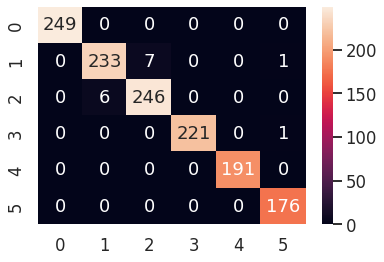

In [24]:
from sklearn.metrics import confusion_matrix  #confusion matrix
sns.set_context('talk')
cm=confusion_matrix(y_test,y_pred)
ax=sns.heatmap(cm,annot=True,fmt='g')    #perform heat map of confusion matrix


Adaboost

In [25]:
from sklearn.ensemble import AdaBoostClassifier  #perform adaboosting
from sklearn.tree import DecisionTreeClassifier
ABC=AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))
param_grid={'n_estimators':[100,150,200],
            'learning_rate':[0.01,0.001]}
gv_abc=GridSearchCV(ABC,param_grid=param_grid,scoring='accuracy',n_jobs=-1)
gv_abc.fit(x_train,y_train)

GridSearchCV(estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1)),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.001],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy')

In [26]:
gv_abc.best_estimator_

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.01, n_estimators=100)

In [27]:
y_pred=gv_abc.predict(x_test)         #predicted test values
print(classification_report(y_test,y_pred))      #classification report


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       0.00      0.00      0.00       241
           2       0.51      1.00      0.68       252
           3       0.38      1.00      0.55       222
           4       0.00      0.00      0.00       191
           5       0.00      0.00      0.00       176

    accuracy                           0.54      1331
   macro avg       0.31      0.50      0.37      1331
weighted avg       0.35      0.54      0.41      1331



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


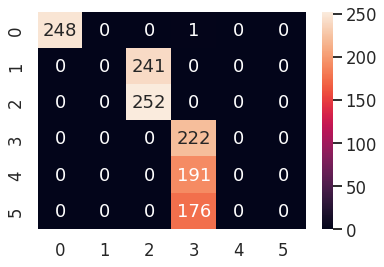

In [28]:
sns.set_context('talk')
cm=confusion_matrix(y_test,y_pred)      #confusion matrix
ax=sns.heatmap(cm,annot=True,fmt='g')    #made heat map

Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression    #perform logistic regression
lm_l2=LogisticRegression(penalty='l2',solver='saga',max_iter=500).fit(x_train,y_train)

In [30]:
y_pred=lm_l2.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       0.96      0.92      0.94       241
           2       0.93      0.96      0.95       252
           3       0.99      0.99      0.99       222
           4       1.00      1.00      1.00       191
           5       0.98      0.99      0.99       176

    accuracy                           0.98      1331
   macro avg       0.98      0.98      0.98      1331
weighted avg       0.98      0.98      0.98      1331



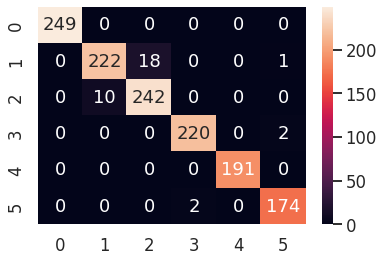

In [31]:
sns.set_context('talk')
cm=confusion_matrix(y_test,y_pred)     # made confusion matrix and made heat map
sns.heatmap(cm,annot=True,fmt='g')

Voting Classifier

In [32]:
from sklearn.ensemble import VotingClassifier      #perform voting calssifier
estimators=[('lm-l2',lm_l2),('gbc',GBC)] #the combined model-logistic regression,gradient boosting
vc=VotingClassifier(estimators,voting='soft')
vc=vc.fit(x_train,y_train)

In [33]:
y_pred=vc.predict(x_test)             #predited test values
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       249
           1       0.97      0.96      0.96       241
           2       0.96      0.97      0.97       252
           3       1.00      1.00      1.00       222
           4       1.00      1.00      1.00       191
           5       0.99      1.00      0.99       176

    accuracy                           0.99      1331
   macro avg       0.99      0.99      0.99      1331
weighted avg       0.99      0.99      0.99      1331



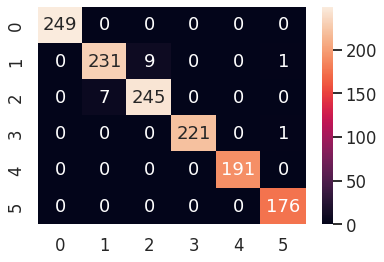

In [34]:
sns.set_context('talk')               # confusion matrix 
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='g')     #heat map

All the algorithm performed very well on dataset except ada boost ,its accuracy is too low

